# Opinion Formation

### Imports

In [9]:
import numpy as np
import random
import math
import os
import scipy as sp
import cellpylib as cpl
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import demos.ca.CA_module as ca
#from demos.ca.CA_module import CA

## Move all results we want to keep here

## Generate new results here

## SOC Hypothesis
Hypothesis: When the system is at its critical temperature, the observed cluster sizes and durations will follow a power law distribution

In [46]:
# Step 0 - Find the critical temperature of the system
## Empirically (like shown in critical_temperature.py) or
## Analitically, using the approximations referenced in the CA paper
# Done in threshold_plot!!!

# Step 1 - Set the system to the critical temperature
critical_temperature = 50

# Step 2 - Set system to the parameters used to find the critical temperature
GRIDSIZE_X,GRIDSIZE_Y = 21,21
TIMESTEPS = 100
#TEMPERATURE = 0
BETA_PEOPLE = 1
BETA_LEADER = 1
H = 0
p = 1
p_1 = 1 # In this scenario everybody believes the leader at start

INFLUENCE_LEADER = 100             # The one 
a_0 = 1
INFLUENCE_DISTRIBUTION_MEAN = 1

In [69]:
# Step 3 - Simulate system at this critical temperature
temperature = critical_temperature
model = ca.CA(GRIDSIZE_X, GRIDSIZE_Y, temperature, BETA_LEADER, BETA_PEOPLE, H, p, p_1, INFLUENCE_LEADER, INFLUENCE_DISTRIBUTION_MEAN, ca.euclidean_distance, ca.prob_dist_influence_people)
data = model.evolve(TIMESTEPS)

100%|██████████| 99/99 [00:25<00:00,  3.83it/s]


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1800x1800 -pix_fmt rgba -r 4.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y figures/21x21_opinion_grid_evolution.mp4


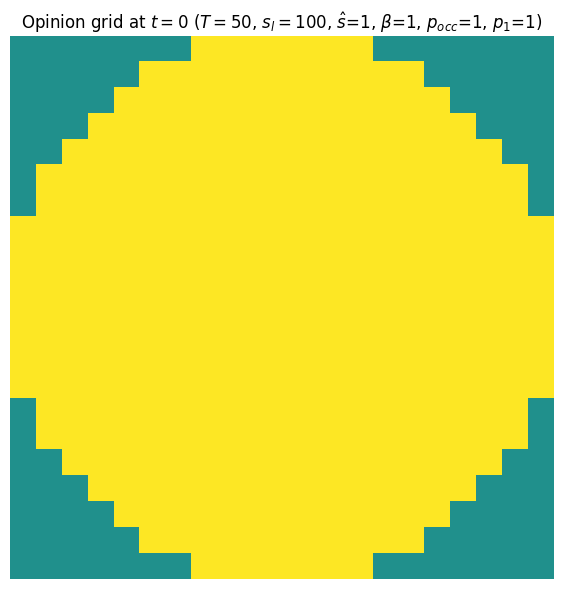

In [55]:
# Step 4 - Plot opinion change to see if clusters do form
model.plot_opinion_grid_evolution(data,save=False) # This creates a video in the folder figures!

In [30]:
# For cluster counting
from pylab import *
from scipy.ndimage import measurements


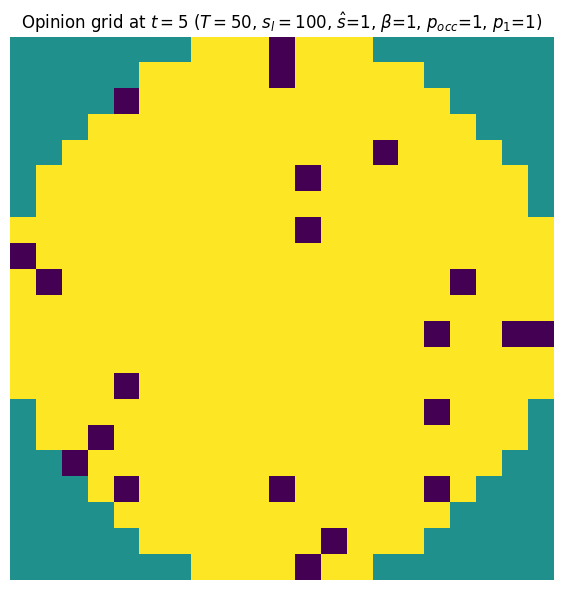

In [78]:
model.plot_opinion_grid_at_time_t(data,5) # This creates a video in the folder figures!

In [79]:
opinions = data['opinions'][5].copy()
opinions[opinions == 1] = 0
opinions[opinions == -1] = 1
print(opinions)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0.

Unique values and counts [0. 1. 2.] [ 1 17  2]


C:\Users\Pablo\AppData\Local\Temp\ipykernel_16276\3352208750.py:5: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  lw, num_cluster = measurements.label(opinions)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_16276\3352208750.py:6: DeprecationWarning: Please use `sum` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  areas = measurements.sum(opinions, lw, index=arange(lw.max() + 1))


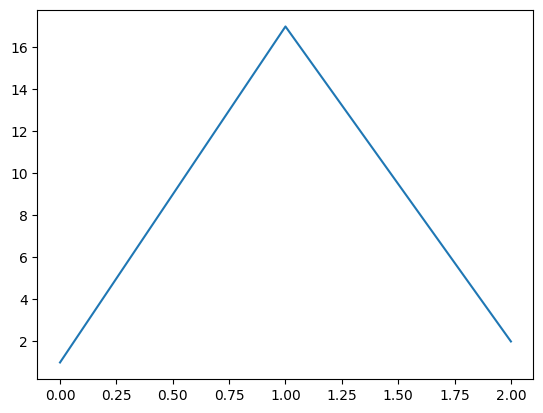

In [82]:
# Step 5 - Get cluster sizes from simulation
R = int(GRIDSIZE_X/2)

# To feed it to the function we first turn the 1s into 0s and the -1s into 1s
lw, num_cluster = measurements.label(opinions)
areas = measurements.sum(opinions, lw, index=arange(lw.max() + 1))
unique, counts = np.unique(areas, return_counts=True)

#print(lw,num_cluster)
#print('Areas',areas)

print('Unique values and counts',unique,counts)


# MVP: Count connected individuals with same opinion
# https://stackoverflow.com/questions/25664682/how-to-find-cluster-sizes-in-2d-numpy-array
# TODO: Count actual grid sizes


In [ ]:
# Step 6 - Plot them to see if their sizes follow power law

In [ ]:
# Step 7 - Verify it with the package powerlaw